In [1]:
# Collect and load entire data
import pandas as pd #pandas for data analysis and manuiplation
import numpy as np #numircal pythoh
import matplotlib.pyplot as plt #for visualization
import seaborn as sns #for visualization


In [2]:
import os #for interaction with the os

In [3]:
os.listdir(r'F:\Realworld_data_analysis\Uber_newyork_data_analysis\uber-pickups-in-new-york-city') #to list all files in a directory
files = os.listdir(r'F:\Realworld_data_analysis\Uber_newyork_data_analysis\uber-pickups-in-new-york-city')[-7:] #choosing the last 7 files we will work with

In [4]:
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [5]:
#removing an unwanted file uber-raw-data-janjune-15.csv
files.remove('uber-raw-data-janjune-15.csv')
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [6]:
path = r"F:\Realworld_data_analysis\Uber_newyork_data_analysis\uber-pickups-in-new-york-city"
#concating all files in one df
final_df = pd.DataFrame()
for file in files :
    df = pd.read_csv(path + "/"+file,encoding="UTF-8")
    final_df = pd.concat([final_df,df])

In [7]:
final_df

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
...,...,...,...,...
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764


In [8]:
final_df.shape

(4534327, 4)

In [9]:
#making a copy of df
cdf = final_df.copy()

In [10]:
cdf.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [11]:
cdf.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [13]:
#converting date time to the right format
cdf['Date/Time']=pd.to_datetime(cdf['Date/Time'])
cdf['Date/Time']

0         2014-04-01 00:11:00
1         2014-04-01 00:17:00
2         2014-04-01 00:21:00
3         2014-04-01 00:28:00
4         2014-04-01 00:33:00
                  ...        
1028131   2014-09-30 22:57:00
1028132   2014-09-30 22:57:00
1028133   2014-09-30 22:58:00
1028134   2014-09-30 22:58:00
1028135   2014-09-30 22:58:00
Name: Date/Time, Length: 4534327, dtype: datetime64[ns]

In [14]:
cdf.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

In [15]:
#getting day name from date time column
cdf['day_name']=cdf['Date/Time'].dt.day_name()

In [16]:
cdf['day']=cdf['Date/Time'].dt.day

In [17]:
cdf['minutes']=cdf['Date/Time'].dt.minute

In [18]:
cdf['month']=cdf['Date/Time'].dt.month
cdf['hour']=cdf['Date/Time'].dt.hour
cdf['year']=cdf['Date/Time'].dt.year

In [19]:
cdf.head()

,Date/Time,Lat,Lon,Base,day_name,day,minutes,month,hour,year
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Tuesday,1,11,4,0,2014
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Tuesday,1,17,4,0,2014
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Tuesday,1,21,4,0,2014
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Tuesday,1,28,4,0,2014
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Tuesday,1,33,4,0,2014


In [20]:
cdf.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
day_name             object
day                   int64
minutes               int64
month                 int64
hour                  int64
year                  int64
dtype: object

In [35]:
#installing plotly
!pip install plotly

In [36]:
import plotly.express as px

In [37]:
px.bar(x=cdf['day_name'].value_counts().index,y=cdf['day_name'].value_counts())

In [28]:
cdf['day_name'].value_counts()

Thursday     755145
Friday       741139
Wednesday    696488
Tuesday      663789
Saturday     646114
Monday       541472
Sunday       490180
Name: day_name, dtype: int64

<BarContainer object of 7 artists>

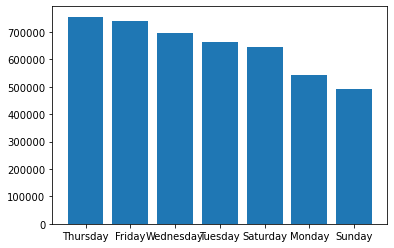

In [42]:
#analysis of rides per day name
plt.bar(cdf['day_name'].value_counts().index, cdf['day_name'].value_counts())

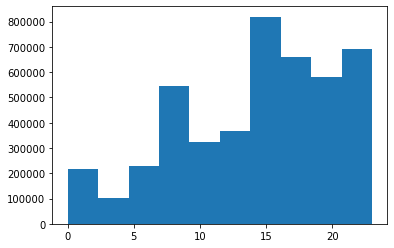

In [44]:
#analysis by hour
plt.hist(cdf['hour']);

In [48]:
#analysis per hour per month
cdf['month'].unique()

array([4, 8, 7, 6, 5, 9], dtype=int64)

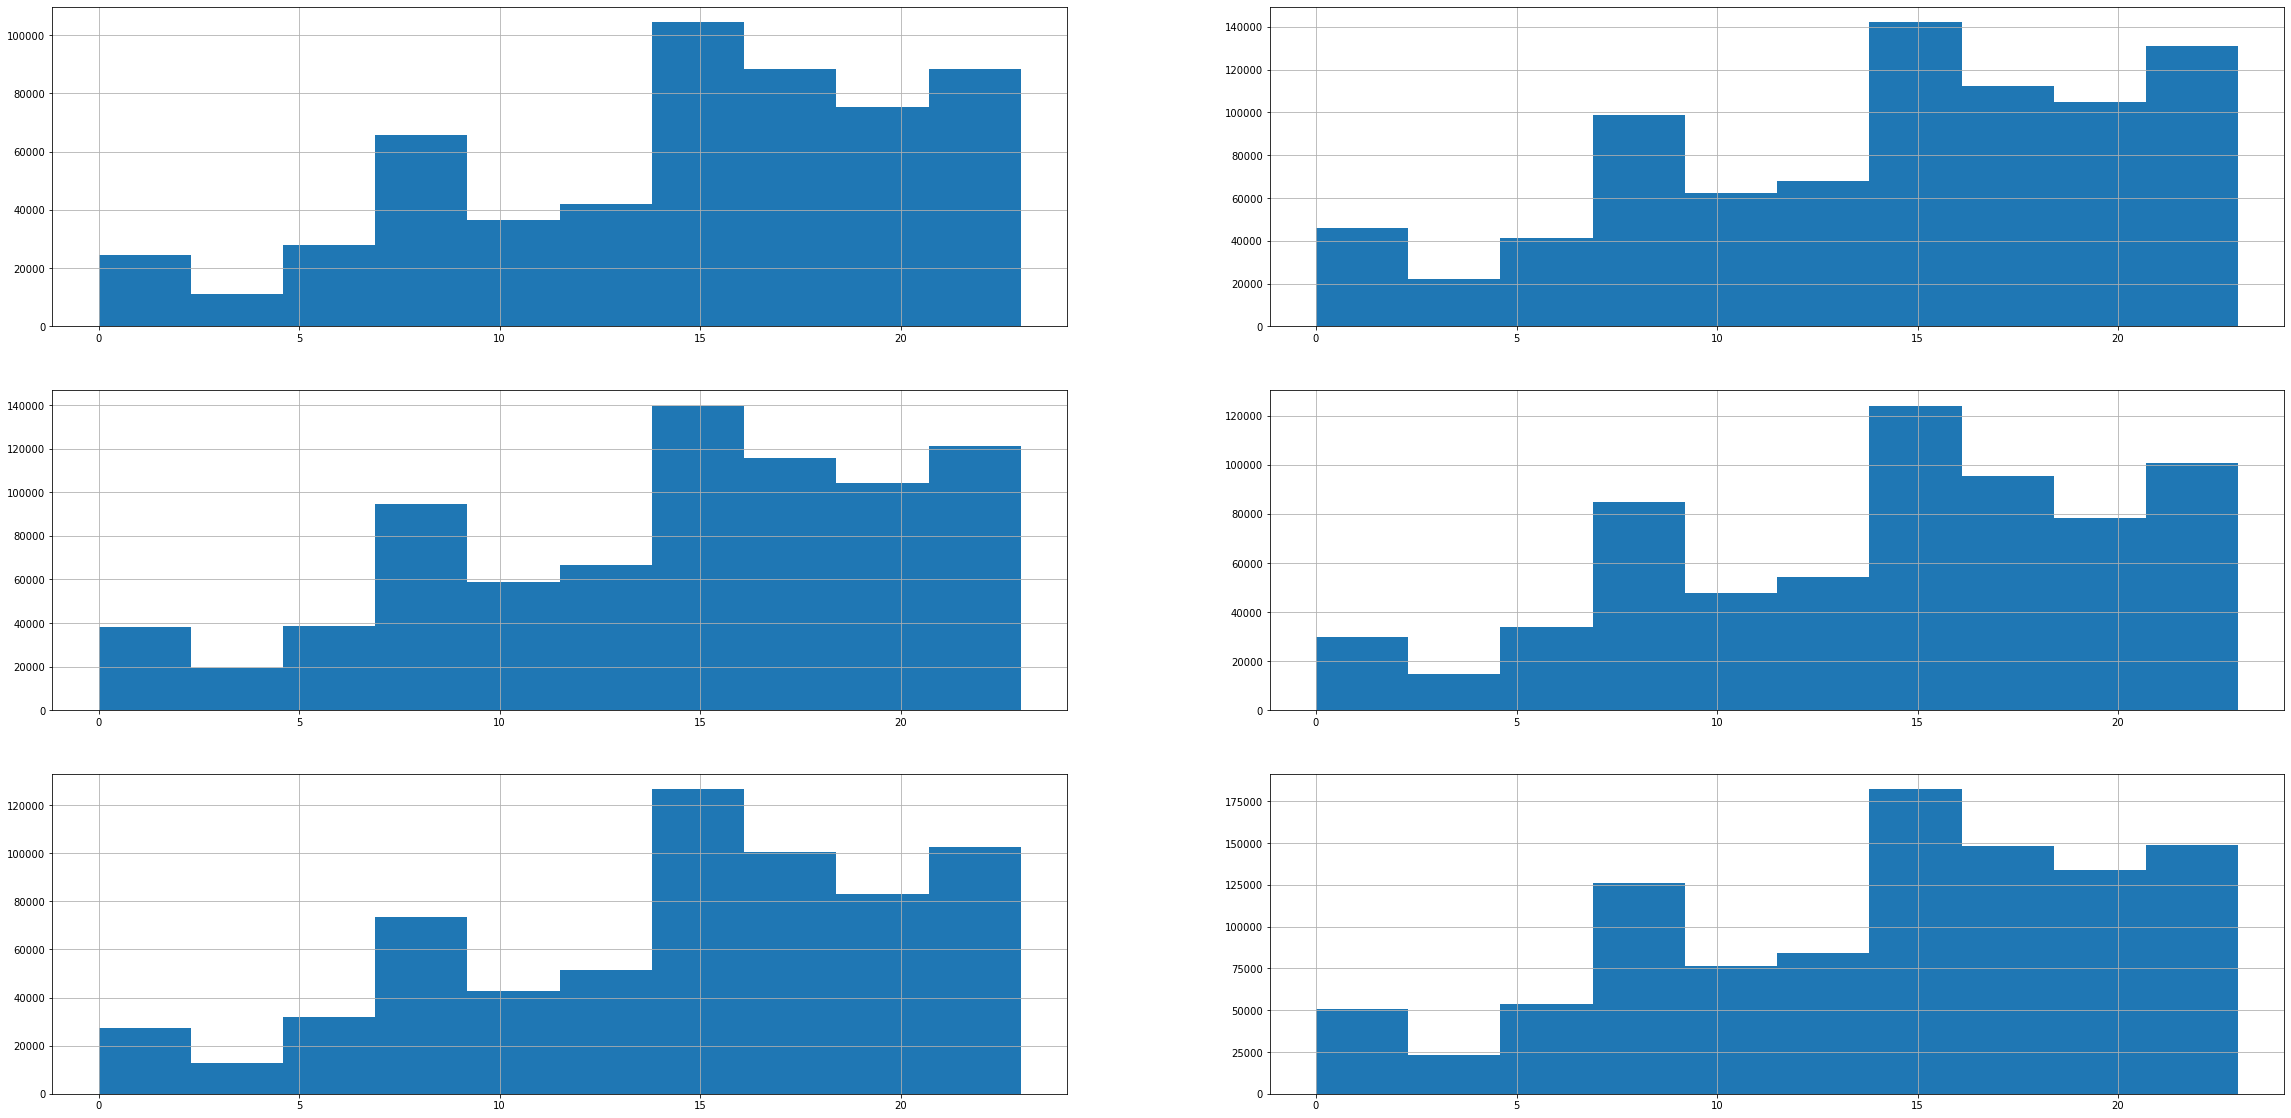

In [62]:
#analysis of rush hour in each month per hour
plt.figure(figsize=(40,20))
for i,month in enumerate(cdf['month'].unique()):
    plt.subplot(3,2,i+1)#create a matrix of plots
    cdf[cdf['month']==month]['hour'].hist()
   

In [66]:
!pip install chart_studio

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=88c9cdba80b6eb8b70951505ce348776de341a664f743d28bc89e4f54f723fcf
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [67]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [68]:
cdf.groupby('month')['hour'].count()

month
4     564516
5     652435
6     663844
7     796121
8     829275
9    1028136
Name: hour, dtype: int64

In [72]:
trace1 = go.Bar(
    x = cdf.groupby('month')['hour'].count().index, #uses the index of the data as x axis values
    y = cdf.groupby('month')['hour'].count(), #uses the counts as the y values
    name='Analaysis of rides per hour per month'
);

In [73]:
iplot([trace1])

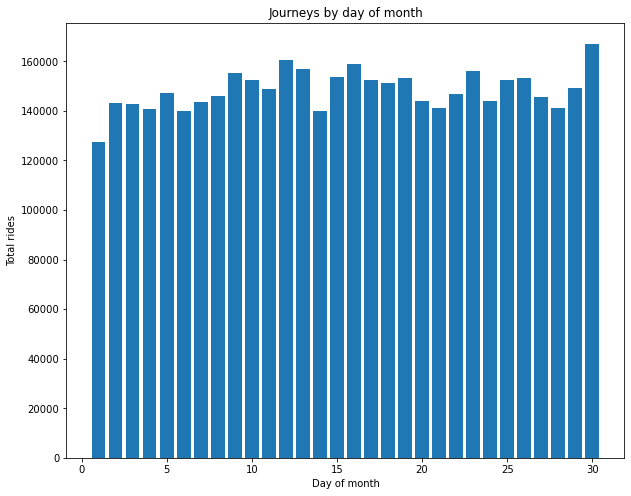

In [83]:
#analaysis of journies per day
plt.figure(figsize=(10,8))
plt.hist(cdf['day'],bins = 30,rwidth=0.8,label = 'Rides per day',range = (0.5,30.5));
plt.xlabel('Day of month');
plt.ylabel('Total rides');
plt.title("Journeys by day of month");

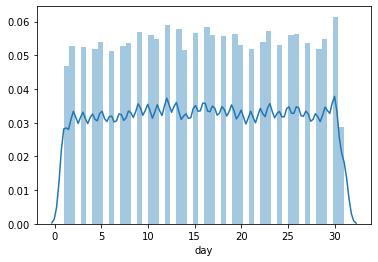

In [81]:
sns.distplot(cdf['day'])

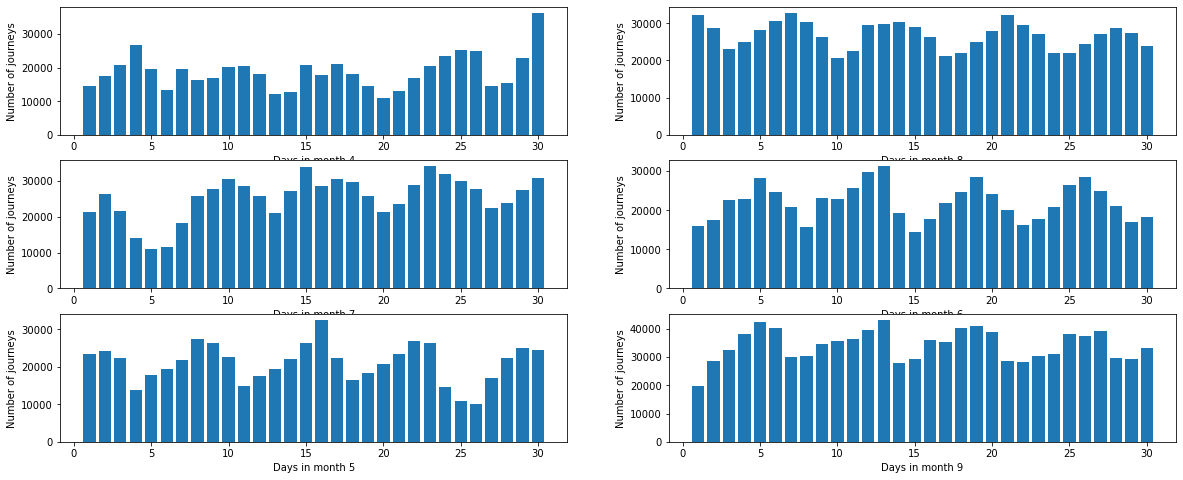

In [92]:
plt.figure(figsize=(20,8))
for i, month in enumerate(cdf['month'].unique(),1): #1 used to indicate that 1 will get 1 instead of 0 as initial
    plt.subplot(3,2,i)
    df_out = cdf[cdf['month']==month]
    plt.hist(df_out['day'],bins=30,range=(0.5,30.5),rwidth=0.8)
    plt.xlabel('Days in month {}'.format(month))
    plt.ylabel('Number of journeys')

Text(0.5, 1.0, 'hours of day vs lat of passengers')

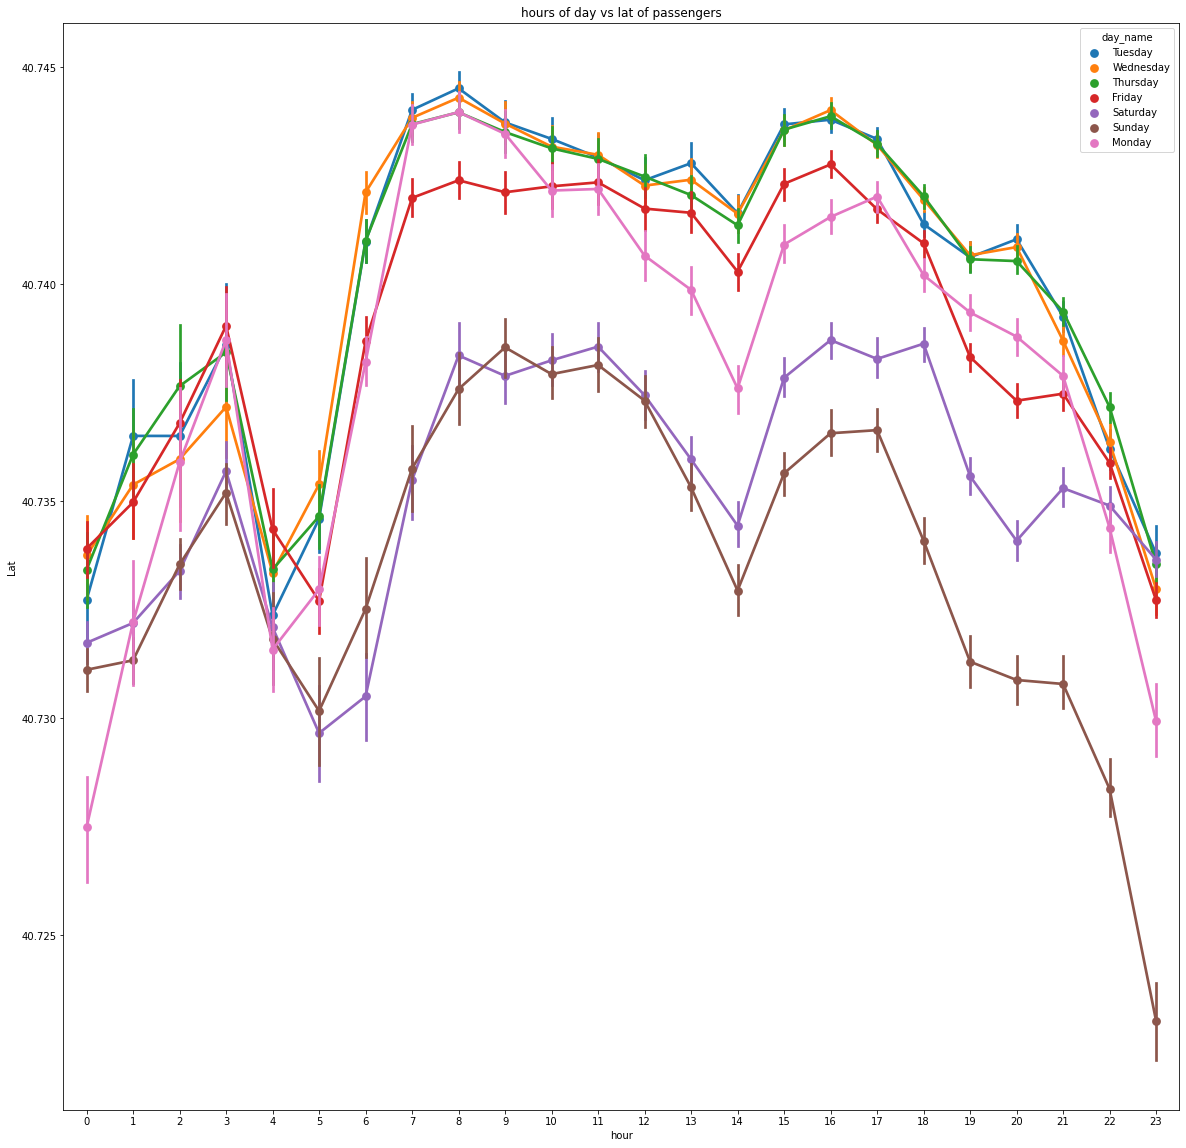

In [98]:
plt.figure(figsize=(20,20))
ax = sns.pointplot(x='hour',y='Lat',data=cdf,hue='day_name');
ax.set_title('hours of day vs lat of passengers')

In [99]:
cdf.head()

,Date/Time,Lat,Lon,Base,day_name,day,minutes,month,hour,year
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Tuesday,1,11,4,0,2014
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Tuesday,1,17,4,0,2014
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Tuesday,1,21,4,0,2014
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Tuesday,1,28,4,0,2014
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Tuesday,1,33,4,0,2014


In [105]:
base= cdf.groupby(['Base','month'])['Date/Time'].count().reset_index()
base

,Base,month,Date/Time
0,B02512,4,35536
1,B02512,5,36765
2,B02512,6,32509
3,B02512,7,35021
4,B02512,8,31472
5,B02512,9,34370
6,B02598,4,183263
7,B02598,5,260549
8,B02598,6,242975
9,B02598,7,245597


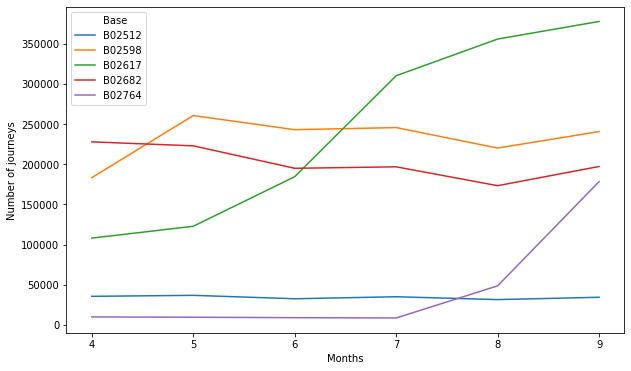

In [115]:
plt.figure(figsize=(10,6))
sns.lineplot(x='month',y='Date/Time',hue = 'Base',data=base)
plt.xlabel("Months")
plt.ylabel("Number of journeys");

In [116]:
def count_rows(rows) :
    return len(rows)

In [121]:
#groups by dayname and hour then returns the count of each hour in that day

by_cross = cdf.groupby(['day_name','hour']).apply(count_rows)
by_cross

day_name   hour
Friday     0       13716
           1        8163
           2        5350
           3        6930
           4        8806
                   ...  
Wednesday  19      47017
           20      47772
           21      44553
           22      32868
           23      18146
Length: 168, dtype: int64

In [123]:
pivot = by_cross.unstack()
pivot

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_name,,,,,,,,,,,,,,,,,,,,,
Friday,13716,8163,5350,6930,8806,13450,23412,32061,31509,25230,...,36206,43673,48169,51961,54762,49595,43542,48323,49409,41260
Monday,6436,3737,2938,6232,9640,15032,23746,31159,29265,22197,...,28157,32744,38770,42023,37000,34159,32849,28925,20158,11811
Saturday,27633,19189,12710,9542,6846,7084,8579,11014,14411,17669,...,31418,38769,43512,42844,45883,41098,38714,43826,47951,43174
Sunday,32877,23015,15436,10597,6374,6169,6596,8728,12128,16401,...,28151,31112,33038,31521,28291,25948,25076,23967,19566,12166
Thursday,9293,5290,3719,5637,8505,14169,27065,37038,35431,27812,...,36699,44442,50560,56704,55825,51907,51990,51953,44194,27764
Tuesday,6237,3509,2571,4494,7548,14241,26872,36599,33934,25023,...,34846,41338,48667,55500,50186,44789,44661,39913,27712,14869
Wednesday,7644,4324,3141,4855,7511,13794,26943,36495,33826,25635,...,35148,43388,50684,55637,52732,47017,47772,44553,32868,18146


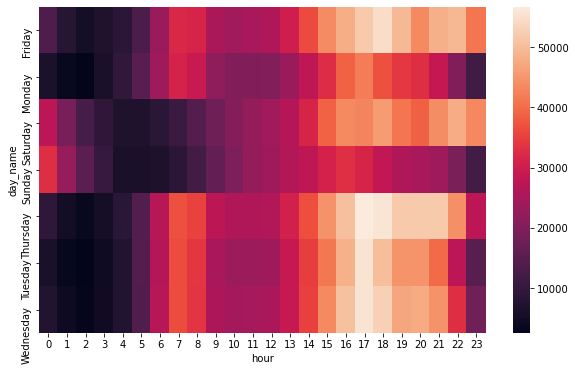

In [125]:
plt.figure(figsize=(10,6))
sns.heatmap(pivot)

In [129]:
def heatmap_creation(parm1,parm2,data):
    grouped_data = data.groupby([parm1,parm2]).apply(count_rows)
    pivoted = grouped_data.unstack()
    plt.figure(figsize=(10,6))
    sns.heatmap(pivoted)

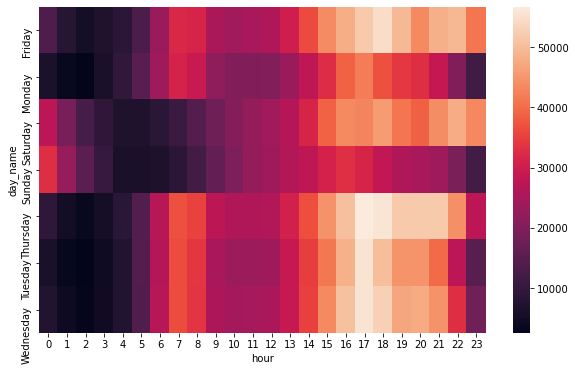

In [135]:
heatmap_creation('day_name','hour',cdf)

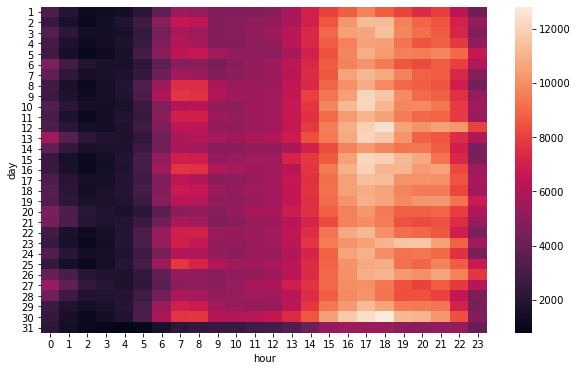

In [134]:
heatmap_creation('day','hour',cdf)

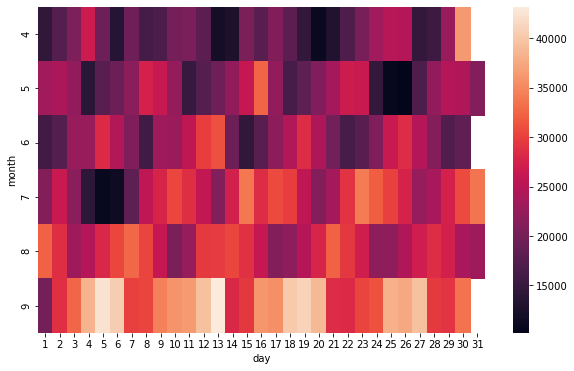

In [132]:
heatmap_creation('month','day',cdf)

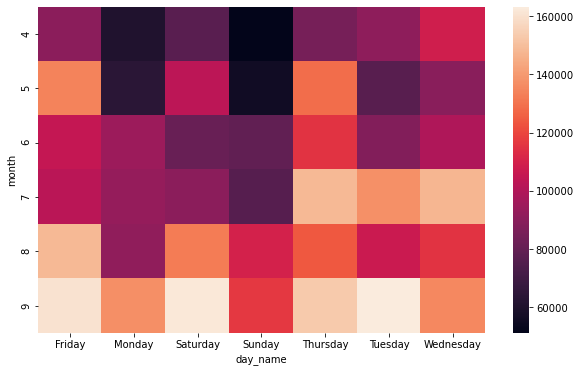

In [133]:
heatmap_creation('month','day_name',cdf)